# EDSA - Twitter Sentiment Classification

### Climate Change Belief Analysis 2022 

### Predict an individual’s belief in climate change based on historical tweet data

#### Executed by: TeamMH1-ExploreAl Climate Change Belief Analysis 2022

Members

### Predict Overview: EDSA - Twitter Sentiment Classification

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

## Table of Contents

<font color=blue> 1. Importing Packages</font>

<font color=blue>2. Loading Data</font>

<font color=blue>3. Exploratory Data Analysis (EDA)</font>

<font color=blue>4. Sentiment Analysis</font>

<font color=blue>5. Data Processing and Engineering</font>

<font color=blue>6. Feature Engineering</font>

<font color=blue>7. Modeling Building</font>

<font color=blue>8. Model Performance</font>

<font color=blue>9. Conclusion</font>

<font color=blue>10. Export</font>

<font color=blue>11. References</font>

## 1. Importing Packages

In [1]:

import numpy as np
import pandas as pd
import time 
import re

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
english_stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

## 2. Loading the Data

In [2]:
# Load Data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


## 4. Exploratory Data Analysis (EDA)

In [4]:
df_train.head(10)
df_test.head(5)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
df_train.value_counts(normalize=True)

sentiment  message                                                                                                                                       tweetid
-1         #BillNye Grade school science guy spreading lie of climate change #CNN donna doesn't match truth does… https://t.co/zi4lfot0ru                84006      0.000063
 1         RT @mashable: Possibly the most beautiful and distinct sign of climate change https://t.co/u0KdiMwHk8                                         237234     0.000063
           RT @mashable: Trump falsely claims that nobody knows if global warming is real https://t.co/uszV0jlRUu https://t.co/PvmYh984Id                667336     0.000063
           RT @mashable: Trump's order will begin to unravel America's best defense against climate change https://t.co/Tmv83ewROa                       319226     0.000063
           RT @mateosfo: 4) Plus dozens of start-ups, investors, non-profits employing thousands of Californians addressing climate change. Our exp

In [6]:
df_train['sentiment'].value_counts() # Sentiments positive ,negative ,neutral??

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

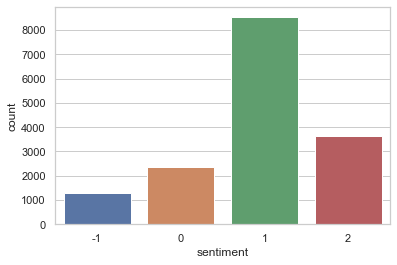

In [7]:
sns.countplot(x=df_train['sentiment']) #sentiment 1 appears to be more in count

In [8]:
df_train.duplicated().sum()# No duplicates

0

<AxesSubplot:ylabel='sentiment'>

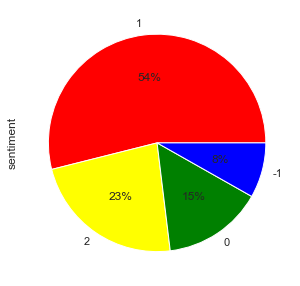

In [9]:
df_train.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(5,5),colors=["red", "yellow", "green",'blue'])

## 5. Data Processing and Engineering

In [10]:
# encoder for target feature
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df_train['sentiment']=lb.fit_transform(df_train['sentiment'])

In [11]:
df_train['message'].isnull().sum() #No null values on message columns

0

In [12]:
tweet_train  =df_train["message"]
tweet_valid=df_test["message"]
target=df_train['sentiment']

In [13]:
#Remove Additional Letter such as @

REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "

def preprocess_reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(tweet_train)
reviews_valid_clean = preprocess_reviews(tweet_valid)

In [14]:
#Remove stop Words

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words

no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_valid = remove_stop_words(reviews_valid_clean)

In [15]:
#stemming
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews_train = get_stemmed_text(no_stop_words_train)
stemmed_reviews_test = get_stemmed_text(no_stop_words_valid)

In [ ]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(stemmed_reviews_train)
X = tfidf_vectorizer.transform(stemmed_reviews_train)
X_test = tfidf_vectorizer.transform(stemmed_reviews_test)

## 6. Feature Engineering

## 7. Modeling building

## 8. Model Performance

## 9. Conclusion

## 10. Export

## 11. Reference